In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [104]:
df=pd.read_csv(r"C:\\Users\Priyanshu Gupta\Desktop\machine learning\NLP\Project for determining message as spam or ham\spam.csv",delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [105]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


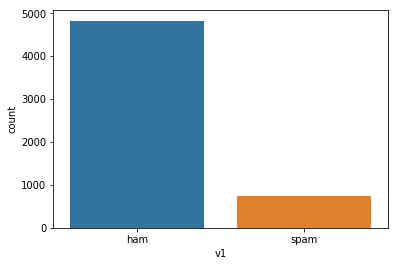

In [106]:
sns.countplot(df.v1)

In [107]:
X=df.v2
#X=df.v2.values
Y=df.v1
le=LabelEncoder()
Y=le.fit_transform(Y)
print(Y)
Y=Y.reshape(-1,1)
print(type(X))

[0 0 1 ... 0 0 0]
<class 'pandas.core.series.Series'>


In [108]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15)

In [109]:
X_train.shape

(4736,)

In [110]:
#Process the data
#Tokenize the data and convert the text to sequences using Tokenizer class of keras.
#padding to ensure that all the sequences have the same shape.
#here max length of sentence is chosen as 150

In [113]:

max_words=1000
max_len=150
tok=Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences=tok.texts_to_sequences(X_train)
print(sequences)
sequences_matrix=sequence.pad_sequences(sequences,maxlen=max_len)
sequences_matrix

[[545, 43, 48, 13, 624, 100, 68, 221, 131, 2, 11], [254, 5, 194, 65, 6, 164, 6, 504, 10, 389, 36, 1, 504, 6, 194, 3, 28, 66, 10], [13, 481], [190, 38, 12, 135], [301, 46, 426], [237, 102, 25, 31, 482, 11, 21, 505, 237, 72, 77, 194], [154, 254, 5, 1, 59], [191, 67, 9, 4, 695, 255, 12, 3, 2, 156, 14, 191, 345, 264, 67, 9, 229, 7, 66, 785], [656, 38, 89, 657, 3, 359], [201, 16, 49, 13, 337, 13, 838, 45, 268, 26, 483, 506, 162, 574, 484, 546, 174, 278, 366, 346, 249], [507, 43, 360, 172, 3, 313, 40, 62, 34, 547, 15, 265, 786], [548, 1, 197, 283, 15, 129, 787, 48, 242, 28, 39, 17], [95, 508, 118, 62, 176, 347, 61, 549, 56, 313, 788], [94, 103, 76, 53, 6, 17, 59, 103, 76, 48, 2, 250, 14, 19, 3, 17, 59, 55, 979], [390, 32, 980], [325, 138, 51, 177, 125, 8, 7, 54, 15, 5], [67, 9, 4, 194, 65, 12, 440], [230, 6, 52, 109, 441, 97, 658, 252, 20, 222, 3, 197, 325, 138, 16, 21, 51, 33, 30, 366], [3, 12, 509], [6, 85, 32], [31, 696, 659, 746, 909, 7, 789, 485, 326, 10], [21, 63, 1, 77, 1, 58, 176, 91

array([[  0,   0,   0, ..., 131,   2,  11],
       [  0,   0,   0, ...,  28,  66,  10],
       [  0,   0,   0, ...,   0,  13, 481],
       ...,
       [  0,   0,   0, ...,  20,  50,  74],
       [  0,   0,   0, ...,   2,  60, 284],
       [  0,   0,   0, ..., 130,  13, 307]])

In [115]:
def RNN():
    inputs=Input(name='inputs',shape=[max_len])
    layer=Embedding(max_words,50,input_length=max_len)(inputs)
    layer=LSTM(64)(layer)
    layer=Dense(256,name='FC1')(layer)
    layer=Activation('relu')(layer)
    layer=Dropout(0.5)(layer)
    layer=Dense(1,name='out_layer')(layer)
    layer=Activation('sigmoid')(layer)
    model=Model(inputs=inputs,outputs=layer)
    return model

In [116]:
model=RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)  

In [118]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Instructions for updating:
Use tf.cast instead.
Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.3267 - acc: 0.8759 - val_loss: 0.1122 - val_acc: 0.9757
Epoch 2/10
3788/3788 [==============================] - 4s 950us/step - loss: 0.0858 - acc: 0.9789 - val_loss: 0.0427 - val_acc: 0.9926
Epoch 3/10
3788/3788 [==============================] - 4s 997us/step - loss: 0.0473 - acc: 0.9868 - val_loss: 0.0416 - val_acc: 0.9884
Epoch 4/10
3788/3788 [==============================] - 4s 1ms/step - loss: 0.0363 - acc: 0.9886 - val_loss: 0.0258 - val_acc: 0.9926
Epoch 5/10
3788/3788 [==============================] - 4s 979us/step - loss: 0.0249 - acc: 0.9934 - val_loss: 0.0511 - val_acc: 0.9831


In [128]:
test_sequences=tok.texts_to_sequences(X_test)
test_sequences_matrix=sequence.pad_sequences(test_sequences,maxlen=max_len)
print(Y_test.shape)
test_sequences_matrix.shape


(836, 1)


(836, 150)

In [121]:
accr=model.evaluate(test_sequences_matrix,Y_test)

836/836 [==============================] - 1s 873us/step


In [123]:
print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.03f}'.format(accr[0],accr[1]))

Test set
 Loss: 0.058
 Accuracy: 0.972


In [124]:
accr

[0.05830305447561319, 0.972488038277512]

In [125]:
model.predict(test_sequences_matrix)

array([[1.94132328e-03],
       [2.67056525e-02],
       [1.85233355e-03],
       [4.03869152e-03],
       [4.61459160e-04],
       [9.99656558e-01],
       [6.17954135e-03],
       [6.20484352e-05],
       [2.71019340e-03],
       [9.78210568e-03],
       [5.67495823e-03],
       [8.12709332e-05],
       [1.72841549e-03],
       [9.98740077e-01],
       [8.55326653e-06],
       [2.00277567e-03],
       [5.25967479e-02],
       [2.50495970e-02],
       [4.64303583e-01],
       [8.38756561e-04],
       [4.82410192e-03],
       [4.54431772e-03],
       [4.84558940e-03],
       [6.06805086e-04],
       [9.67383385e-05],
       [9.91050899e-01],
       [9.82643366e-01],
       [1.42213106e-02],
       [1.24520063e-03],
       [5.53521514e-03],
       [2.53450871e-02],
       [7.92586803e-03],
       [2.74479389e-04],
       [9.99820471e-01],
       [2.70380676e-02],
       [2.38758326e-03],
       [7.84772635e-03],
       [3.10331583e-04],
       [4.29704785e-03],
       [8.85605812e-04],
